### 1. Load the Simulated Dataset

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("../data/simulated/marketing_mmm_dataset.csv")
print(df.columns)
# Convert Week to datetime and set as index
df["Week"] = pd.to_datetime(df["Week"])
df.set_index("Week", inplace=True)
df.head()


Index(['Week', 'Sales', 'TV_Spend', 'Radio_Spend', 'Digital_Spend',
       'Influencer_Spend', 'OOH_Spend', 'Seasonality_Index', 'Holiday_Flag',
       'Competitor_Activity'],
      dtype='object')


,Sales,TV_Spend,Radio_Spend,Digital_Spend,Influencer_Spend,OOH_Spend,Seasonality_Index,Holiday_Flag,Competitor_Activity
Week,,,,,,,,,
2022-01-02,11071.82,11986.86,3758.07,14575.24,3825.42,9102.30,-16.69,0,1424.49
2022-01-09,22626.07,9446.94,4606.08,31263.66,3813.51,6231.35,17.60,0,1037.51
2022-01-16,11556.64,12590.75,6829.28,14854.45,4305.48,8358.59,17.53,0,922.95
2022-01-23,13764.70,16092.12,4261.87,17677.83,3021.00,6135.04,41.50,1,1307.29
2022-01-30,10486.48,9063.39,4386.33,16770.01,3681.95,10121.50,39.25,1,513.24


### 2. Time Series Plot of Spend & Sales

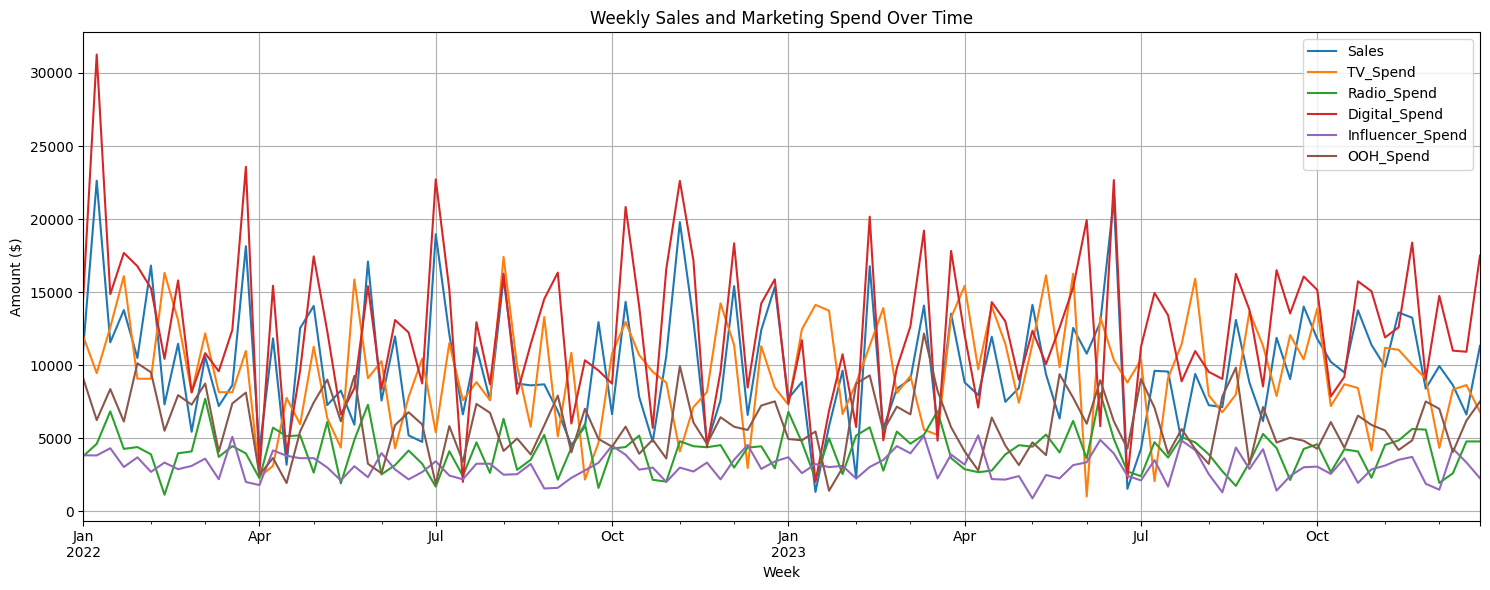

In [18]:
plt.figure(figsize=(15, 6))
df[["Sales", "TV_Spend", "Radio_Spend", "Digital_Spend", "Influencer_Spend", "OOH_Spend"]].plot(ax=plt.gca())
plt.title("Weekly Sales and Marketing Spend Over Time")
plt.ylabel("Amount ($)")
plt.grid(True)
plt.tight_layout()
plt.show()


### 3. Correlation Heatmap

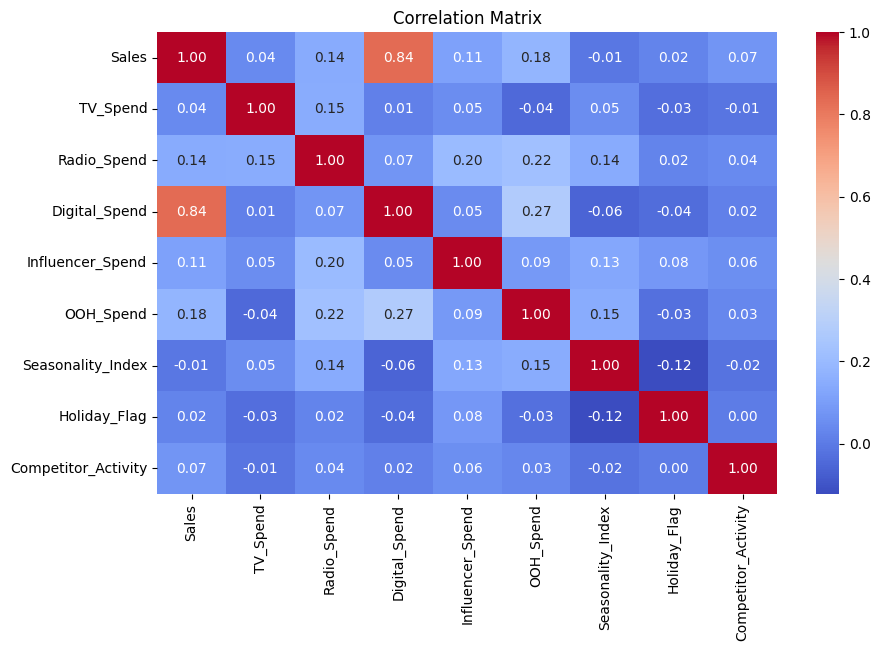

In [19]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


### 4. Pairplot of Spend Channels vs Sales

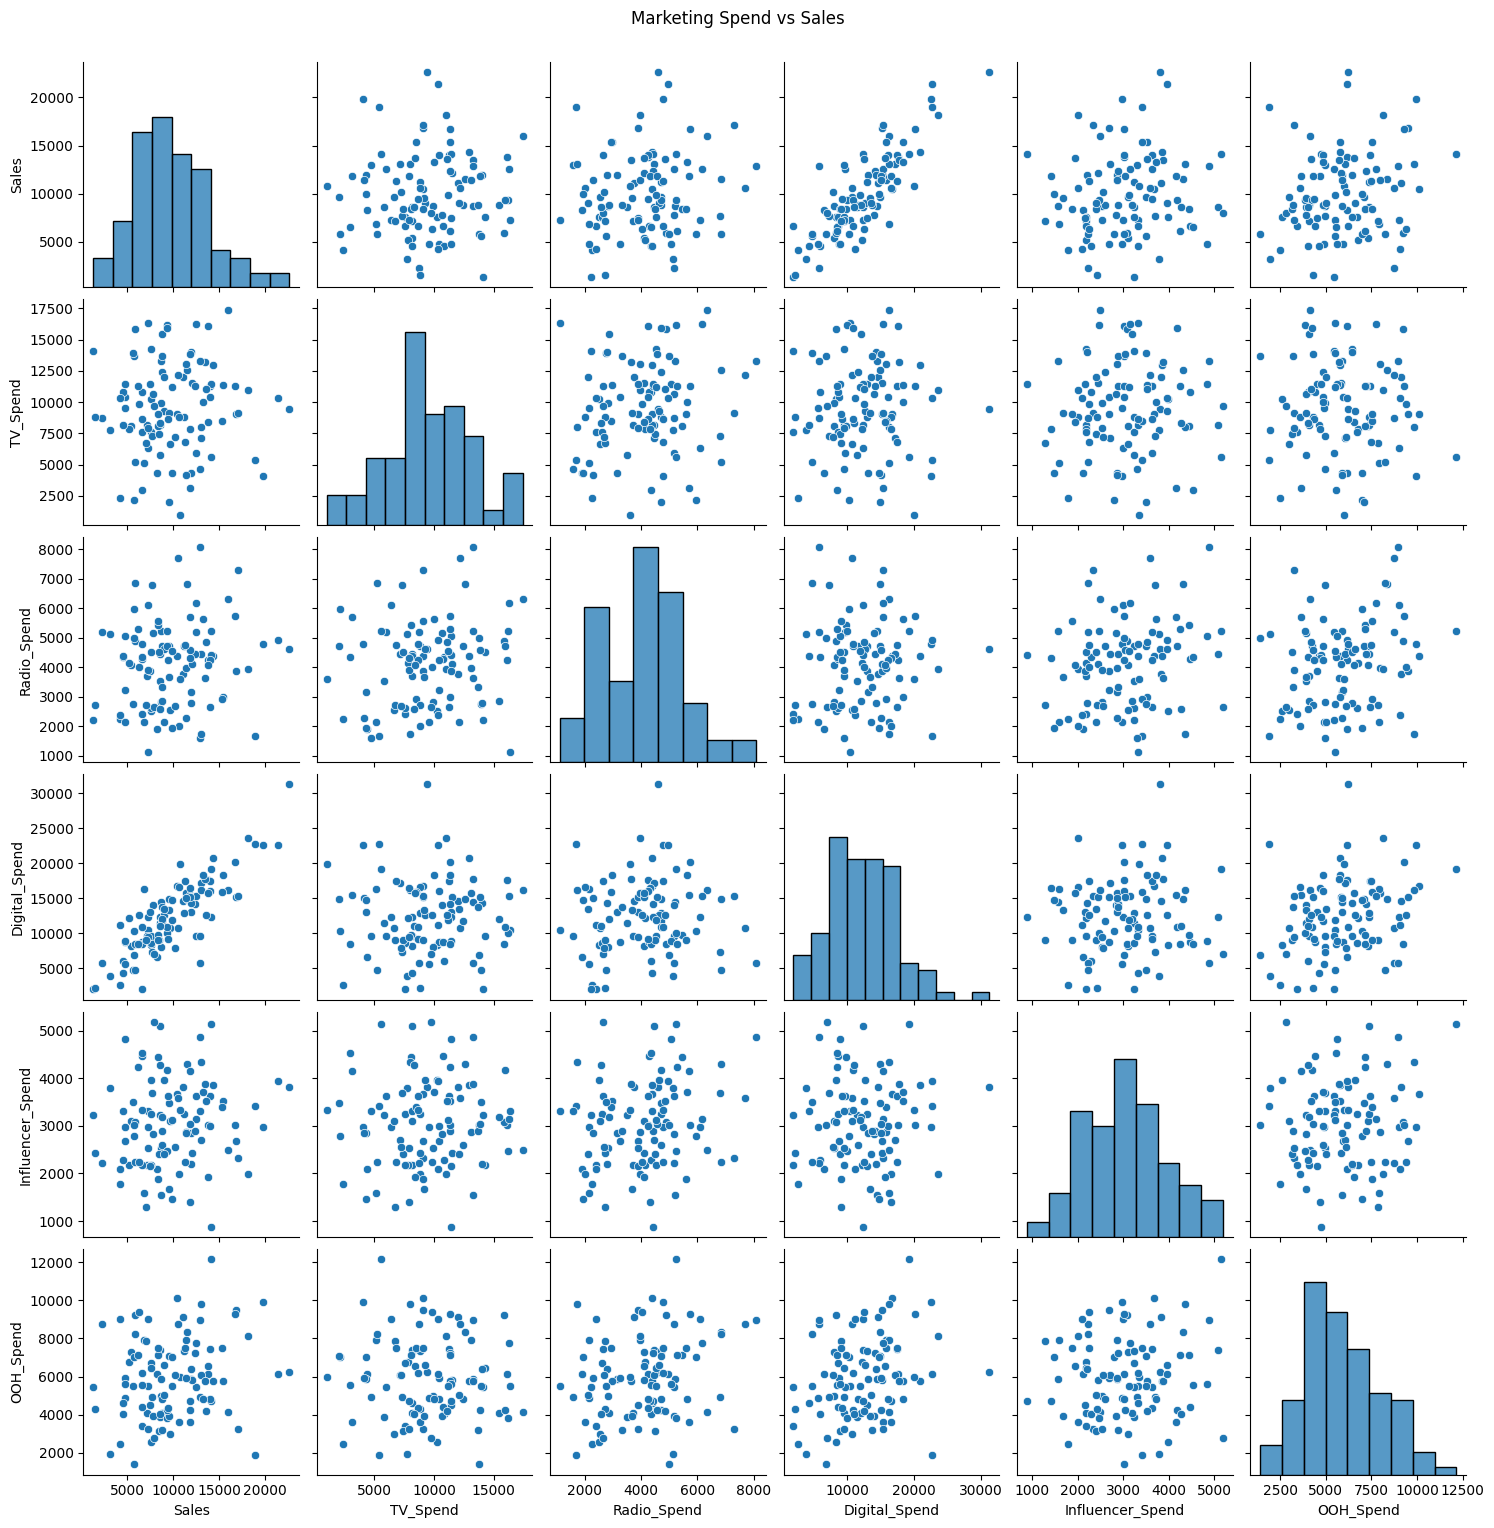

In [20]:
sns.pairplot(df[["Sales", "TV_Spend", "Radio_Spend", "Digital_Spend", "Influencer_Spend", "OOH_Spend"]])
plt.suptitle("Marketing Spend vs Sales", y=1.02)
plt.show()


### 5. Seasonality Check — Sales by Month

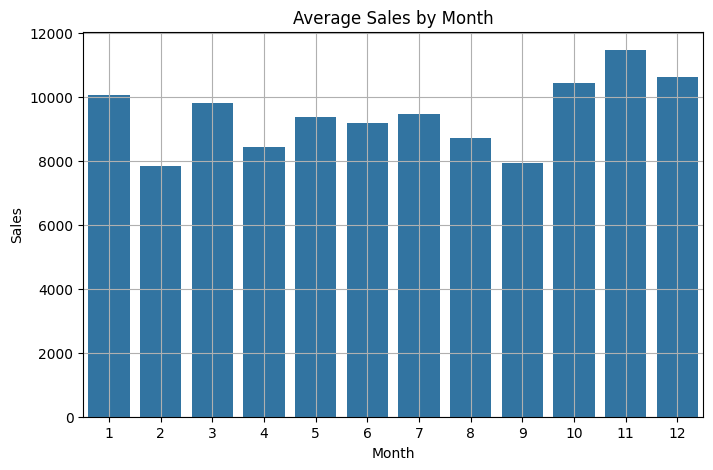

In [21]:
df["Month"] = df.index.month
monthly_sales = df.groupby("Month")["Sales"].median()

plt.figure(figsize=(8, 5))
sns.barplot(x=monthly_sales.index, y=monthly_sales.values)
plt.title("Average Sales by Month")
plt.xlabel("Month")
plt.ylabel("Sales")
plt.grid(True)
plt.show()


### 6. Holiday Impact on Sales

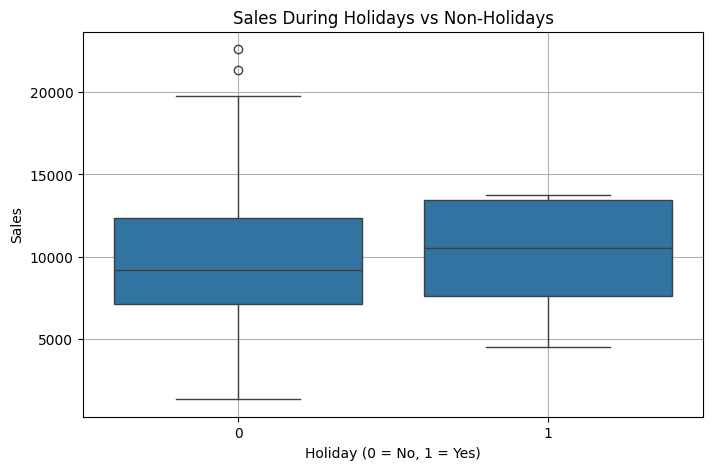

In [22]:
plt.figure(figsize=(8, 5))
sns.boxplot(x="Holiday_Flag", y="Sales", data=df)
plt.title("Sales During Holidays vs Non-Holidays")
plt.xlabel("Holiday (0 = No, 1 = Yes)")
plt.ylabel("Sales")
plt.grid(True)
plt.show()
